# Solution to re-exam (F24), August 2024

By shsp and jakle @ DTU Compute

In [1]:
from sympy import *

init_printing()
from dtumathtools import *

## Exercise 1

Consider the function $f: \mathbb{R}^2 \to \mathbb{R}$ given by
\begin{equation*}
f(x,y) = 2 x^2 + y^2 - x y^2. 
\end{equation*}

In [2]:
x, y = symbols("x y", real=True)
f = 2 * x**2 + y**2 - x * y**2

f

### (a)

The level set $\{(x,y)\in\mathbb R^2|f(x,y)=2\}$ is constituted by:

In [3]:
solve(Eq(f, 2)), solveset(Eq(f, 2), x)

This level set consists of the vertical line $x=1$ and the parabola $x=\frac12 y^2-1.$ Plotted in a $(y,x)$ coordinate system (note that the axes have been switched):

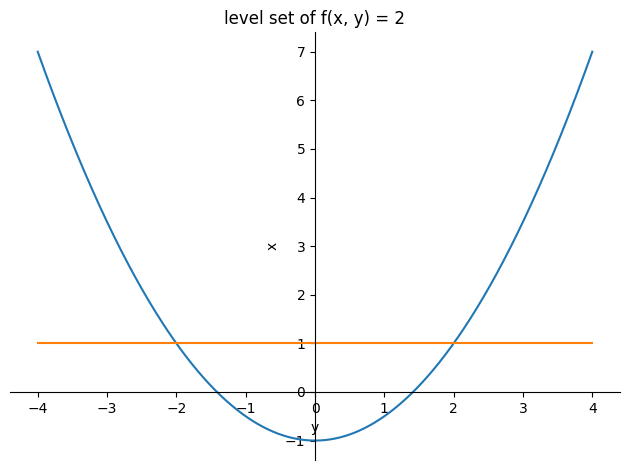

In [4]:
plot(
    y**2 / 2 - 1,
    1,
    (y, -4, 4),
    xlabel="y",
    ylabel="x",
    title="level set of f(x, y) = 2",
)

To plot it in the more usual $(x,y)$ coordinate system, we have to use `plot_implicit`:

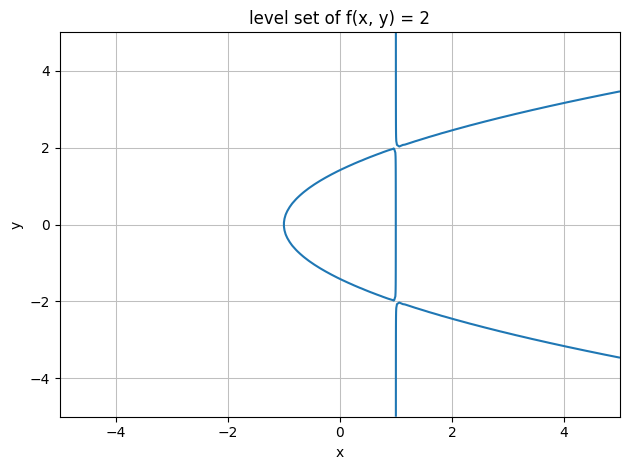

In [5]:
dtuplot.plot_implicit(
    Eq(f, 2),
    (x, -5, 5),
    (y, -5, 5),
    xlabel="x",
    ylabel="y",
    title="level set of f(x, y) = 2",
)

### (b)

We can compute the gradient $\nabla f(x,y)$ for all $(x,y) \in \mathbb{R}^2$ directly by:

In [6]:
grad = dtutools.gradient(f)
grad

⎡         2  ⎤
⎢  4⋅x - y   ⎥
⎢            ⎥
⎣-2⋅x⋅y + 2⋅y⎦

### (c)

We can compute the Hessian matrix $\pmb{H}_f(x,y)$ for all $(x,y) \in \mathbb{R}^2$ directly by:

In [7]:
H = dtutools.hessian(f)
H

⎡ 4     -2⋅y  ⎤
⎢             ⎥
⎣-2⋅y  2 - 2⋅x⎦

### (d)

At a stationary point, the gradient equals $(0,0).$ Testing for the point $(0,0)$:

In [8]:
grad.subs({x:0,y:0})

⎡0⎤
⎢ ⎥
⎣0⎦

We see that $(0,0)$ indeed is a stationary point.

Hessian matrix eigenvalues:

In [9]:
Hlambdas = Matrix(list(H.eigenvals()))
Hlambdas

⎡        _____________________    ⎤
⎢       ╱  2            2         ⎥
⎢-x - ╲╱  x  + 2⋅x + 4⋅y  + 1  + 3⎥
⎢                                 ⎥
⎢        _____________________    ⎥
⎢       ╱  2            2         ⎥
⎣-x + ╲╱  x  + 2⋅x + 4⋅y  + 1  + 3⎦

Eigenvalues of the Hessian matrix at $(0,0)$:

In [10]:
Hlambdas.subs({x: 0, y: 0})

⎡2⎤
⎢ ⎥
⎣4⎦

According to Theorem 5.2.4, with two positive eigenvalues of the corresponding Hessian matrix, the stationary point $(0,0)$ is a local minimum.

### (e)

All stationary points by solving for when both partial derivatives are zero simultaneously:

In [11]:
solve([Eq(grad[0], 0), Eq(grad[1], 0)])

So, $f$ has the three stationary points $(0,0)$, $(1,-2)$, $(1,2).$

Hessian matrix eigenvalues at the two latter stationary points:

In [12]:
Hlambdas.subs({x: 1, y: -2}).evalf()

⎡-2.47213595499958⎤
⎢                 ⎥
⎣6.47213595499958 ⎦

In [13]:
Hlambdas.subs({x: 1, y: -2}).evalf()

⎡-2.47213595499958⎤
⎢                 ⎥
⎣6.47213595499958 ⎦

Both of these stationary points $(1,-2),(1,2)$ show eigenvalues of opposite signs of their corresponding Hessian matrices. According to the Theorem, they are both saddle points. With $(0,0)$ found to be a local minimum above, all stationary points have now been covered for.

## Exercise 2

Given column vector $\boldsymbol y$ in $\mathbb R^4$ equipped with the standard inner product:

In [14]:
y = Matrix([1, 2, 2, 4])
y

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣4⎦

### (a)

Creating the matrix $A=\boldsymbol y \boldsymbol y^T$:

In [15]:
A = y * y.T
A

⎡1  2  2  4 ⎤
⎢           ⎥
⎢2  4  4  8 ⎥
⎢           ⎥
⎢2  4  4  8 ⎥
⎢           ⎥
⎣4  8  8  16⎦

The transpose matrix $A^T$:

In [16]:
A.transpose()

⎡1  2  2  4 ⎤
⎢           ⎥
⎢2  4  4  8 ⎥
⎢           ⎥
⎢2  4  4  8 ⎥
⎢           ⎥
⎣4  8  8  16⎦

According to the list on page 6 in the textbook, since $A=A^T$ then the matrix $A$ is symmetric.

An alternative general argument is as follows: Any matrix of the form $Y Y^T$ is symmetric where $Y$ is a matrix (or vector). The proof is easy: 

\begin{equation*}
    (Y Y^T)^T = (Y^T)^T Y^T = Y Y^T
\end{equation*}

### (b)

We see easily that the second and third columns are formed by multiplying the first column by the scalar $2$, and likewise the fourth column by the scalar $4$. Hence all columns are scalar multiples of each other. Again, it is possible to give a more general argument. Let $A$ be any matrix of the form $\pmb{y} \pmb{y}^T$. Then

\begin{equation*}
    A = \pmb{y} \pmb{y}^T = \pmb{y} [y_1 y_2 \cdots y_n]^T = [\pmb{y} y_1 \, \pmb{y} y_2 \, \cdots \, \pmb{y} y_n] 
\end{equation*}

which shows that all columns are scalar mulitples of $\pmb{y}$.

It follows that any linear combination of columns of $A$ will belong to $\mathrm{span}(\pmb{y})$. Therefore, the rank of the matrix will be $\rho(A)=1$ since the rank is the dimension of span of the columns (i.e., the number of columns that are linearly independent as vectors). We check this:

In [17]:
A.rank()

### (c)

For $\mathbb R^4$, the inner product is given by: $\langle \boldsymbol x,\boldsymbol y \rangle=\boldsymbol x\cdot \boldsymbol y = \boldsymbol y ^T \pmb{x}$.

Hence, we look for a non-zero vector $\boldsymbol x\in \mathbb R^4$ such that $\boldsymbol y ^T \pmb{x} = 0$. A vector that fulfills this could be:

In [18]:
x = Matrix([2, -1, 0, 0])
x

⎡2 ⎤
⎢  ⎥
⎢-1⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣0 ⎦

We check:

In [19]:
x.dot(y)

or, alternatively:

In [20]:
y.T * x

[0]

### (d)

We have:

\begin{equation*}
0 = \langle\boldsymbol x,\boldsymbol y \rangle = \boldsymbol y^T \boldsymbol x,
\end{equation*}

where the last expression is a vector multiplication. Therefore

\begin{equation*}
 A \pmb{x} = \boldsymbol y \boldsymbol y^T \boldsymbol x = \boldsymbol y  0 = \pmb{0} 
\end{equation*}

### (e)

The subspace spanned by $\boldsymbol y$ is denoted $Y=\mathrm{span}(\boldsymbol y)$. Its orthogonal complement is given to be $Y^\perp=\mathrm{ker}A$.

According to the rank-nullity theorem (in Danish: the dimension theorem): 
\begin{equation*}
\mathrm{dim}(\mathbb R^4)=\mathrm{dim}(\mathrm{ker}A)+\rho(A).
\end{equation*} 
We therefore have that $4=\mathrm{dim}(Y^\perp)+1$. Hence, $\mathrm{dim}(Y^\perp)=3$.

### (f)

A basis for $Y^\perp$ is a basis for $\mathrm{ker} A$ and will contain $3$ basis vectors due to its dimension. We find such a basis for $\mathrm{ker}A$ by solving $A\boldsymbol x=\boldsymbol 0,$ quickly done with Sympy:

In [21]:
sols = A.nullspace()
sols

⎡⎡-2⎤  ⎡-2⎤  ⎡-4⎤⎤
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢1 ⎥  ⎢0 ⎥  ⎢0 ⎥⎥
⎢⎢  ⎥, ⎢  ⎥, ⎢  ⎥⎥
⎢⎢0 ⎥  ⎢1 ⎥  ⎢0 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎣⎣0 ⎦  ⎣0 ⎦  ⎣1 ⎦⎦

We perform the GramSchmidt procedure to generate an orthonormal basis vector set spanning the same subspace:

In [22]:
sols_ortho = GramSchmidt(sols, True)
sols_ortho

⎡          ⎡-2⋅√5 ⎤         ⎤
⎢⎡-2⋅√5 ⎤  ⎢──────⎥         ⎥
⎢⎢──────⎥  ⎢  15  ⎥         ⎥
⎢⎢  5   ⎥  ⎢      ⎥  ⎡-4/15⎤⎥
⎢⎢      ⎥  ⎢-4⋅√5 ⎥  ⎢     ⎥⎥
⎢⎢  √5  ⎥  ⎢──────⎥  ⎢-8/15⎥⎥
⎢⎢  ──  ⎥, ⎢  15  ⎥, ⎢     ⎥⎥
⎢⎢  5   ⎥  ⎢      ⎥  ⎢-8/15⎥⎥
⎢⎢      ⎥  ⎢  √5  ⎥  ⎢     ⎥⎥
⎢⎢  0   ⎥  ⎢  ──  ⎥  ⎣ 3/5 ⎦⎥
⎢⎢      ⎥  ⎢  3   ⎥         ⎥
⎢⎣  0   ⎦  ⎢      ⎥         ⎥
⎣          ⎣  0   ⎦         ⎦

In [23]:
v1 = sols_ortho[0]
v2 = sols_ortho[1]
v3 = sols_ortho[2]
v1, v2, v3

⎛          ⎡-2⋅√5 ⎤         ⎞
⎜⎡-2⋅√5 ⎤  ⎢──────⎥         ⎟
⎜⎢──────⎥  ⎢  15  ⎥         ⎟
⎜⎢  5   ⎥  ⎢      ⎥  ⎡-4/15⎤⎟
⎜⎢      ⎥  ⎢-4⋅√5 ⎥  ⎢     ⎥⎟
⎜⎢  √5  ⎥  ⎢──────⎥  ⎢-8/15⎥⎟
⎜⎢  ──  ⎥, ⎢  15  ⎥, ⎢     ⎥⎟
⎜⎢  5   ⎥  ⎢      ⎥  ⎢-8/15⎥⎟
⎜⎢      ⎥  ⎢  √5  ⎥  ⎢     ⎥⎟
⎜⎢  0   ⎥  ⎢  ──  ⎥  ⎣ 3/5 ⎦⎟
⎜⎢      ⎥  ⎢  3   ⎥         ⎟
⎜⎣  0   ⎦  ⎢      ⎥         ⎟
⎝          ⎣  0   ⎦         ⎠

Checking for orthogonality (inner products, meaning dot products, must be 0) and magnitudes of 1:

In [24]:
v1.dot(v2), v2.dot(v3), v3.dot(v1)

In [25]:
v1.norm(), v2.norm(), v3.norm()

Fulfilled, hence they constitute an orthonormal basis for $Y^\perp$.

## Exercise 3

Let the function $f : \mathbb{R} \to \mathbb{R}$ be given by
\begin{equation*}
f(x) = \begin{cases} 
       \frac{\sin(x)}{x} & \text{for } x \neq 0, \\
       1 &  \text{for } x = 0.
       \end{cases}
\end{equation*}

In [26]:
x = symbols("x", real=True)
f = sin(x) / x

### (a)

Plot of the graph for $x \in [-10,10]$:

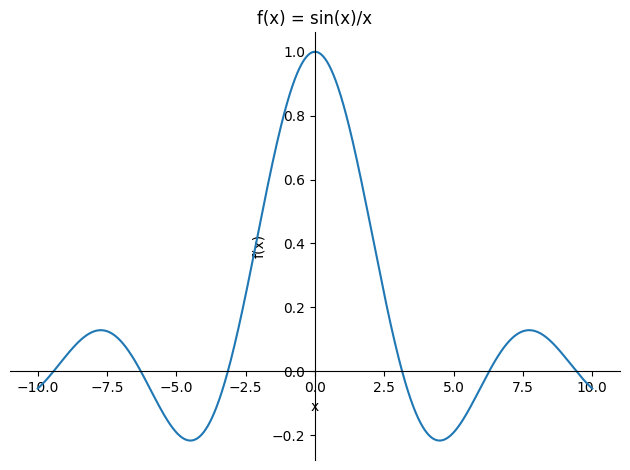

In [27]:
plot(f, (x, -10, 10), ylabel="f(x)", xlabel="x", title="f(x) = sin(x)/x")

The plot shows the graph of $f(x)$ for $x\neq 0$. For $x=0$, the point $(0,1)$ should be added to the plot for completeness.

We consider $x=k\pi$ for each $k\in\mathbb Z$:

- For $k=0$, we have $x=0$, and thus we are in the second case where $f(0)=1.$
- For each $k\in\mathbb Z\setminus\{0\}$ we are in the first case. Since $\sin(k\pi)=0$ for any integer $k$, then $f(k\pi)=\frac{\sin(k\pi)}{kx}=0$ for each $k\in\mathbb Z\setminus\{0\}$. 

We conclude that:
\begin{equation*}
f(k \pi) = \begin{cases} 
       0 & \text{for } k \neq 0, \\
       1 &  \text{for } k = 0.
       \end{cases}
\end{equation*}

### (b)

Second-degree Taylor polynomial of $\sin(x)$ from expansion point $x_0=0$:

In [28]:
sin(x).series(x, 0, 3).removeO()

So, the second-degree Taylor polynomial is $P_2(x)=x.$

### (c)

For Taylor's limit formula of $\sin(x)$ from expansion point $x_0=0$ we add the remainder term to the approximating polynomial from (b) according to Theorem 4.6.1: 
\begin{equation*}
\sin(x)=x+(x-x_0)^2\varepsilon(x-x_0)=x+x^2\varepsilon(x).
\end{equation*}

The limit is:

\begin{equation*}
\lim_{x\to0}\frac{\sin(x)}{x}=\lim_{x\to0}\frac{x+x^2\varepsilon(x)}{x}=\lim_{x\to0}(1+x\varepsilon(x))=1,
\end{equation*}

since $\varepsilon(x)\to0$ for $x\to0$ by definition.

### (d)

We know that $\sin(x)$ and $1/x$ are smooth functions for all $x\neq0$, and thus continuous functions on that interval. According to the first bullet point on page 66 in the textbook, their product $\sin(x)/x$ is thus also continuous for all $x\neq0$. For $x\to0$ we know from (c) that $\sin(x)/x\to1$, but by definition we also have $f(0)=1$. We therefore have continuity at $x=0$. Hence, $f$ is continuous at all $x\in\mathbb R$, so $f$ is a continuous function according to Definition 3.1.1.

### (e)

Given a function $g:\mathbb R\to\mathbb R$ where $g(x)=\sin(3x)/x$ for $x\neq0$ and $g(x)=c$ for $x=0.$

In [29]:
g = sin(3 * x) / x

Taylor's limit formula of $\sin(3x)$, choosing expansion point $x_0=0$:

In [30]:
sin(3 * x).series(x, 0, 3)

So, Taylor's limit formula is $\sin(3x)=3x+x^2\varepsilon(x).$ Finding the limit:
\begin{equation*}
\lim_{x\to0}\frac{\sin(3x)}{x}=\lim_{x\to0}\frac{3x+x^2\varepsilon(x)}{x}=\lim_{x\to0}(3+x\varepsilon(x))=3.
\end{equation*}

Hence, if $c=3$ then $g$ is a continuous function.

Plot:

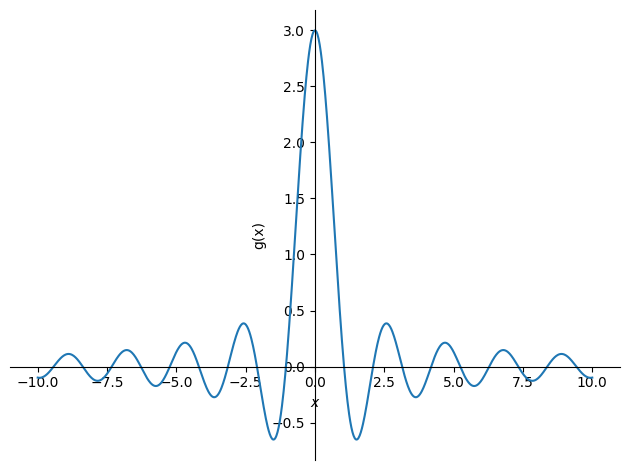

In [31]:
plot(g, (x, -10, 10), ylabel="g(x)")

## Exercise 4

Consider the subset $A \subset \mathbb{R}^2$ given by:
\begin{equation*}
    A = \{(x_1 ,x_2 )\in \mathbb{R}^2 \mid 1 \le x_1^2 +x_2^2 \le 4 \wedge x_1 \ge 0 \wedge x_2 \ge 0\}.
\end{equation*}
Define the function $f: A \to \mathbb{R}$ by
\begin{equation*}
    f(x_1,x_2) = \ln(x_1^2 +x_2^2).
\end{equation*}

In [32]:
x1, x2 = symbols("x1 x2", real=True)
f = ln(x1**2 + x2**2)

### (a)

To show that $r^2 \ln(r^2) -r^2$ is an anti-derivative of $2 \ln(r^2) r$, we simply have to verify that $\left(r^2\ln(r^2)-r^2\right)' = 2r\ln(r^2)$. This is easily done:

In [33]:
r = symbols("r", real=True, positive=True)
exp = r**2 * ln(r**2) - r**2
exp.diff(r)

Of course, it is also possible to differentiate $r^2\ln(r^2)-r^2$ by hand:

\begin{equation*}
\left(r^2\ln(r^2)-r^2\right)'=\left(r^2\ln(r^2)\right)'-2r=(r^2)'\ln(r^2)+r^2\left(\ln(r^2)\right)'-2r=2r\ln(r^2)+r^2\left(\ln(r^2)\right)'-2r.
\end{equation*}

Here the product rule was used. We compute $\left(\ln(r^2)\right)'$ using the chain rule, where we temporarily substitute in $u=r^2$ as the inner function in the logarithm:

\begin{equation*}
\left(\ln(r^2)\right)'=(r^2)'\left(\ln(u)\right)'=2r\frac1u=2r\frac1{r^2}=2/r.
\end{equation*}

Continuing from where we left off before:
\begin{equation*}
\left(r^2\ln(r^2)-r^2\right)'=2r\ln(r^2)+r^22/r-2r=2r\ln(r^2)+r2-2r=2r\ln(r^2).
\end{equation*}

As we wanted to show.

### (b)

Since we know from (a) that $r^2\ln(r^2)-r^2$ is an antiderivative of $2r\ln(r^2)$ for $r>0$, then all antiderivatives when $r>0$ are given by: 
\begin{equation*}
\int 2r\ln(r^2)\mathrm dr=r^2\ln(r^2)-r^2+k,
\end{equation*}
where $k\in\mathbb R$ is an arbitrary constant.

### (c)

The set $A$ is the quarter of an annulus (a "circle ring") with inner radius 1 to outer radius 2 that is located in the first quadrant. Parametrization:
\begin{equation*}
\boldsymbol p(r,\theta)=(r\cos(\theta),r\sin(\theta))\quad,\quad r\in[1,2],\theta\in[0,\pi/2].
\end{equation*}

In [34]:
theta = symbols("theta", real=True)
p = Matrix([r * cos(theta), r * sin(theta)])
p

⎡r⋅cos(θ)⎤
⎢        ⎥
⎣r⋅sin(θ)⎦

Plotting the inner and outer circle sections - the region $A$ is the set of points between the two shown curves, bounded by the axes in the first quadrant:

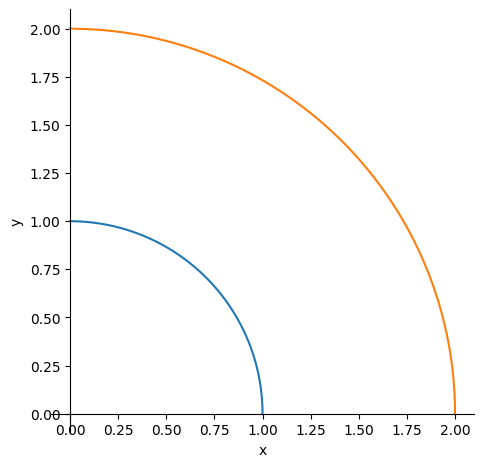

In [35]:
p1 = plot_parametric(*p.subs({r:1}), (theta, 0, pi/2), xlabel="x", ylabel="y", aspect_ratio = (1,1), show=False)
p2 = plot_parametric(*p.subs({r:2}), (theta, 0, pi/2), show=False)
p1.extend(p2)
p1.show()

Partial derivatives of the parametrization:

In [36]:
p_r = p.diff(r)
p_theta = p.diff(theta)
p_r, p_theta

⎛⎡cos(θ)⎤  ⎡-r⋅sin(θ)⎤⎞
⎜⎢      ⎥, ⎢         ⎥⎟
⎝⎣sin(θ)⎦  ⎣r⋅cos(θ) ⎦⎠

Hence, the Jacobian matrix is:

In [37]:
J = p.jacobian([r,theta])
J

⎡cos(θ)  -r⋅sin(θ)⎤
⎢                 ⎥
⎣sin(θ)  r⋅cos(θ) ⎦

and the Jacobian determinant is:

In [38]:
detJ = J.det().simplify()
detJ

### (d)

$f$ is a continuous function for $x_1^2+x_2^2>0$, so within the given region $A$. A continuous function satisfying
the conditions (I) and (II) on page 140 in the textbook is Riemann integrable according to the
remark after Definition 6.3.1.

- $A$ is bounded, so condition (I) is fulfilled.
- The boundary $\partial A$ is formed by a continuously differentiable curve, since it is a circle with a parametrization $\boldsymbol r$ as found in (c). Thus, condition (II) is fulfilled.

We conclude that $f$ is Riemann integrable.

### (e)

$\boldsymbol p$ found in (c) is injective and has non-zero Jacobian determinant on $\Gamma$. To compute the integral $\int_Af(x_1,x_2)\mathrm d(x_1,x_2)$, we can therefore use the change-of-variables theorem 6.4.1:
\begin{equation*}
\int_Af(x_1,x_2)\mathrm d(x_1,x_2)=\int_\Gamma f(\boldsymbol p(r,\theta))\,|\mathrm{det}(J_{\boldsymbol p}(r,\theta))|\,\mathrm d(r,\theta)=\int_1^2\int_0^{\pi/2} f(\boldsymbol p(r,\theta))\,|\mathrm{det}(J_{\boldsymbol p}(r,\theta))|\,\mathrm d\theta \mathrm dr,
\end{equation*}
where $J_{\boldsymbol p}$ is the Jacobian matrix.

Restriction $f(\boldsymbol r(u,v)):$

In [39]:
fr = f.subs({x1: p[0], x2: p[1]}).simplify()
fr

Plane integral:

In [40]:
integrate(fr * detJ, (theta, 0, pi / 2), (r, 1, 2)).expand()

Since

In [41]:
fr * detJ

we can also use the results in (a) to compute the plane integral as:

In [42]:
int_via_anti = S(1)/2 * (pi / 2 - 0) * (exp.subs({r: 2}) - exp.subs({r: 1}))
int_via_anti.expand()

The approximate value is:

In [43]:
_.evalf()